In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
MODEL_NAME = "../dataset/models_classic/sel-10-undersampled_dt.joblib"
DATASET_NAME = "../dataset/merged/test-sel-10.parquet"

In [43]:
df_test = pd.read_parquet(DATASET_NAME).drop(columns=["country", "zone_id", "ts"], errors="ignore")
df_test.head()

,pbo_sum,pbo_mean,tob_mean,sob_sum,tob_sum,sob_mean,fe_mean,fe_sum,so_sum,po4_mean,target
2226400,73959.546875,4622.471680,0.802999,555.434753,12.847986,34.714672,0.000603,0.000603,543.053589,0.071286,0
2275921,90182.906250,5636.431641,0.544295,555.377441,8.708720,34.711090,0.000171,0.000171,563.382202,0.254483,0
683516,28864.388672,3207.154297,1.920685,313.197815,17.286163,34.799759,0.000264,0.000527,319.975616,0.175541,0
1790368,83997.593750,5249.849609,0.579515,555.417297,9.272246,34.713581,0.000271,0.000271,568.409180,0.162474,0
50433,45309.199219,5034.355469,0.602087,312.434021,5.418786,34.714890,0.000247,0.000247,318.812744,0.134948,0


In [44]:
clf: DecisionTreeClassifier = joblib.load(MODEL_NAME)
clf

DecisionTreeClassifier(random_state=42)

In [45]:
clf.get_depth()

33

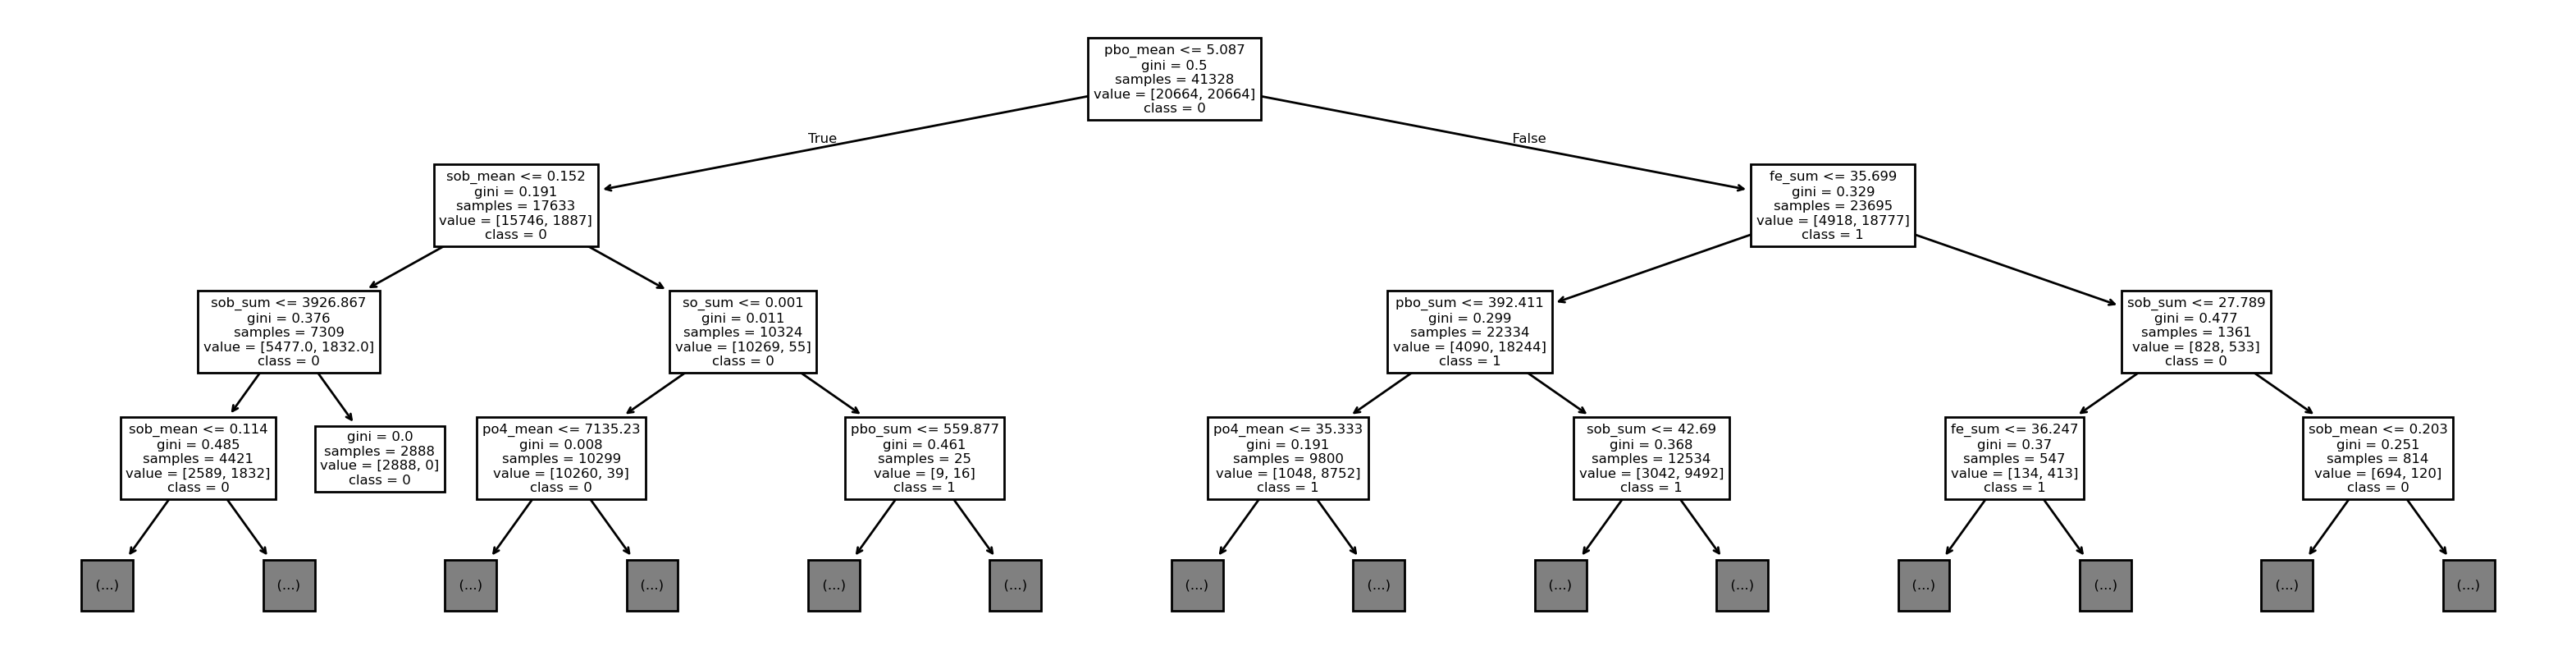

In [46]:
feature_names = list(set(df_test.columns.tolist()) - set("target"))
class_names = [str(x) for x in df_test["target"].unique().tolist()]

fig, ax = plt.subplots(figsize=(20, 5), dpi=200)
plot_tree(clf, max_depth=3, feature_names=feature_names, class_names=class_names, ax=ax)
plt.show()